In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Load data
df = pd.read_pickle("rawFeaturesGTZAN.pkl")
df.head()

,path,rmse-mean,rmse-std,zero-cross-rate-mean,zero-cross-rate-std,tempo,spectral-centroid-mean,spectral-centroid-std,spectral-bandwith-mean,spectral-bandwith.std,...,mfcc16-std,mfcc17-mean,mfcc17-std,mfcc18-mean,mfcc18-std,mfcc19-mean,mfcc19-std,mfcc20-mean,mfcc20-std,class
0,./datasetGTZAN\blues\blues.00000.wav,0.126543,0.061445,0.082917,0.034213,126.048018,1657.768479,383.302894,1905.828648,309.784100,...,7.242394,-1.403959,6.032929,-0.769230,6.430989,-1.871544,7.375974,0.729365,6.830832,0
1,./datasetGTZAN\blues\blues.00001.wav,0.092889,0.054368,0.055907,0.044494,105.468750,1369.737795,598.426532,1895.010409,479.654181,...,7.403108,-0.556167,7.707072,0.078577,6.900453,-0.024042,7.108906,0.238616,6.736544,0
2,./datasetGTZAN\blues\blues.00002.wav,0.171930,0.063360,0.076201,0.037486,156.605114,1445.671461,425.812653,1642.005434,319.019426,...,6.366177,-7.441296,6.877268,-2.184485,7.196716,-2.993339,6.795683,-2.743361,5.515245,0
3,./datasetGTZAN\blues\blues.00003.wav,0.137944,0.085088,0.033254,0.024425,178.205819,929.332212,423.282134,1449.333130,425.434721,...,6.635701,-3.207387,7.029069,0.503238,6.118984,-0.461271,6.065600,-3.583699,5.639071,0
4,./datasetGTZAN\blues\blues.00004.wav,0.088721,0.052970,0.101380,0.050337,135.999178,1684.251695,592.826477,1647.767273,341.270662,...,9.230565,-5.329115,8.619068,-1.064045,7.332860,-4.234475,7.945834,-11.890667,7.429893,0


In [18]:
data = df.drop(["path", "class"], axis=1)
scaler = preprocessing.StandardScaler()
# # To get normal distribution
# scalerQuantile = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
data[data.columns] = scaler.fit_transform(data[data.columns])
X = data.to_numpy()

In [3]:
def viz2D(finalDf, xlabel, ylabel, title, save=False, saveName=None):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel(xlabel, fontsize = 15)
    ax.set_ylabel(ylabel, fontsize = 15)
    ax.set_title(title, fontsize = 20)
    targets = list(range(10))
    classNames = ["Blues", "Classical", "Country", "Disco", "HipHop", "Jazz", "Metal", "Pop", "Reaggea", "Rock"]
    colors = ["blue", "green", "orange", "purple", "red", "brown", "pink", "gray", "olive", "cyan"]
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf["class"] == target
        ax.scatter(finalDf.loc[indicesToKeep, xlabel], finalDf.loc[indicesToKeep, ylabel], 
                c = color, s = 50, alpha=0.7)
    ax.legend(classNames)
    ax.grid()
    plt.savefig(f"./images/{saveName}.jpg") if save else plt.show()

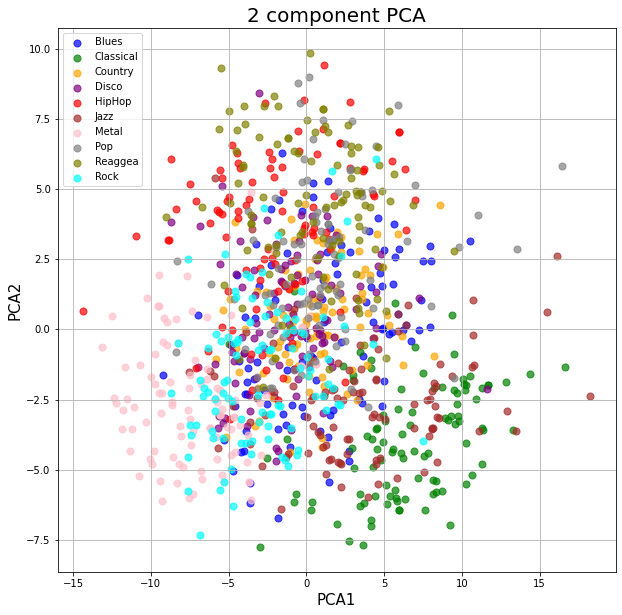

In [6]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ["PCA1", "PCA2"])
finalDf = pd.concat([principalDf, df[["class"]]], axis = 1)
viz2D(finalDf, "PCA1", "PCA2", "2 component PCA", save=True, saveName="PCA-GTZAN-scaled")

C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


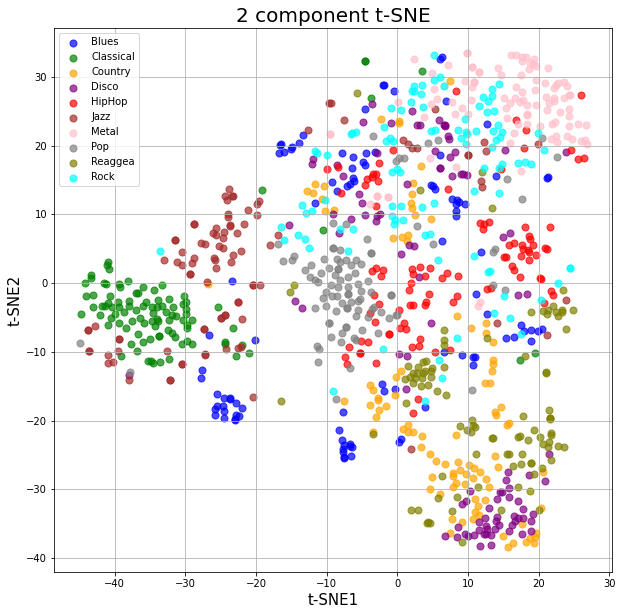

In [12]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=35)
tsneResults = tsne.fit_transform(X)
tsneDf = pd.DataFrame(data = tsneResults, columns = ["t-SNE1", "t-SNE2"])
finalDf = pd.concat([tsneDf, df[["class"]]], axis = 1)
viz2D(finalDf, "t-SNE1", "t-SNE2", "2 component t-SNE", save=True, saveName="tSNE-GTZAN-scaled")

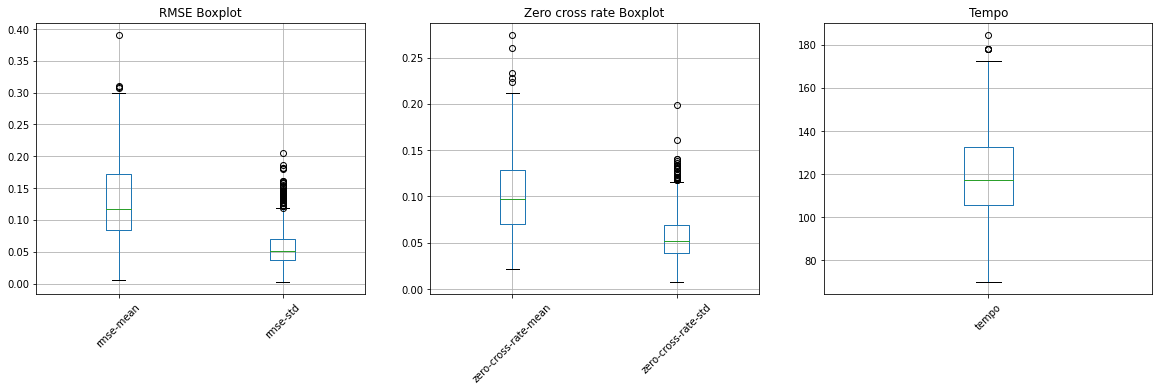

In [22]:
columns = list(df.columns)
columns.remove("path")
columns.remove("class")

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df.boxplot(column = columns[:2], rot=45)
plt.title("RMSE Boxplot")

plt.subplot(1,3,2)
df.boxplot(column = columns[2:4], rot=45)
plt.title("Zero cross rate Boxplot")

plt.subplot(1,3,3)
df.boxplot(column = columns[4:5], rot=45)
plt.title("Tempo")
plt.show()

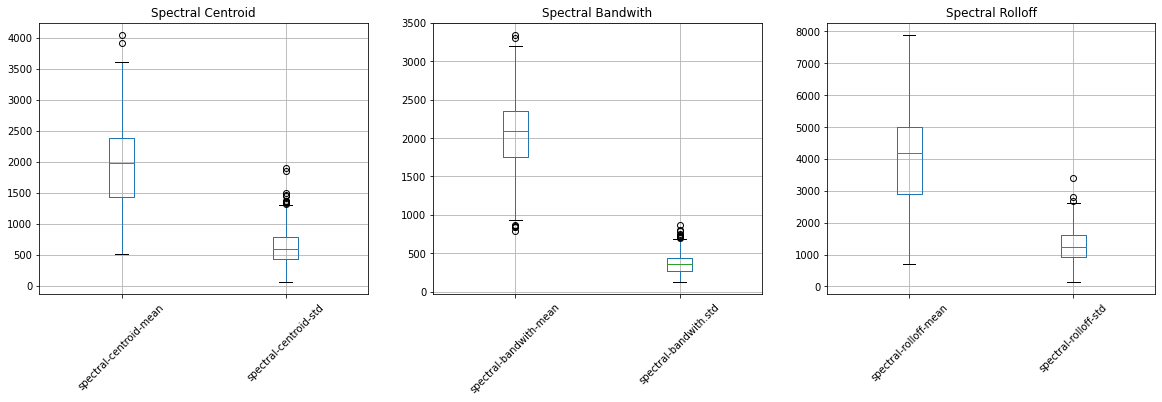

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df.boxplot(column = columns[5:7], rot=45)
plt.title("Spectral Centroid")

plt.subplot(1,3,2)
df.boxplot(column = columns[7:9], rot=45)
plt.title("Spectral Bandwith")

plt.subplot(1,3,3)
df.boxplot(column = columns[9:11], rot=45)
plt.title("Spectral Rolloff")
plt.show()

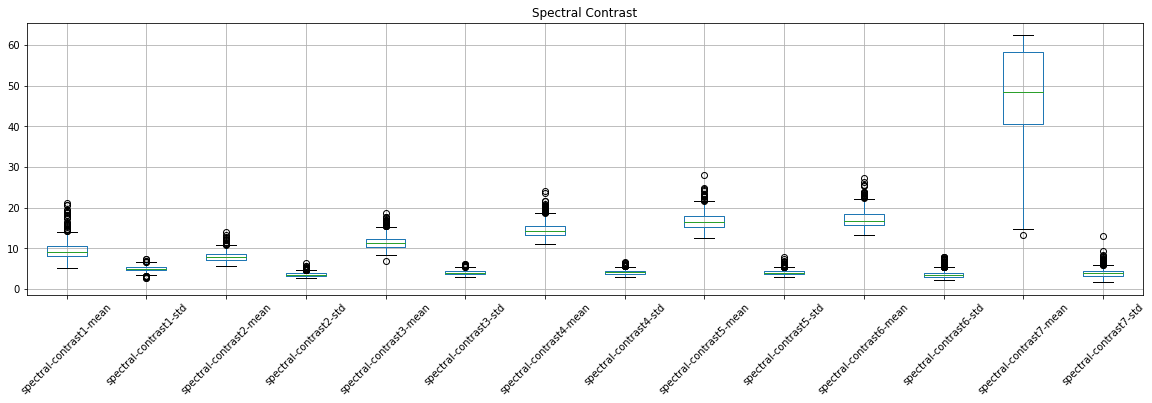

In [15]:
plt.figure(figsize=(20,5))
df.boxplot(column = columns[11:25], rot=45)
plt.title("Spectral Contrast")
plt.show()

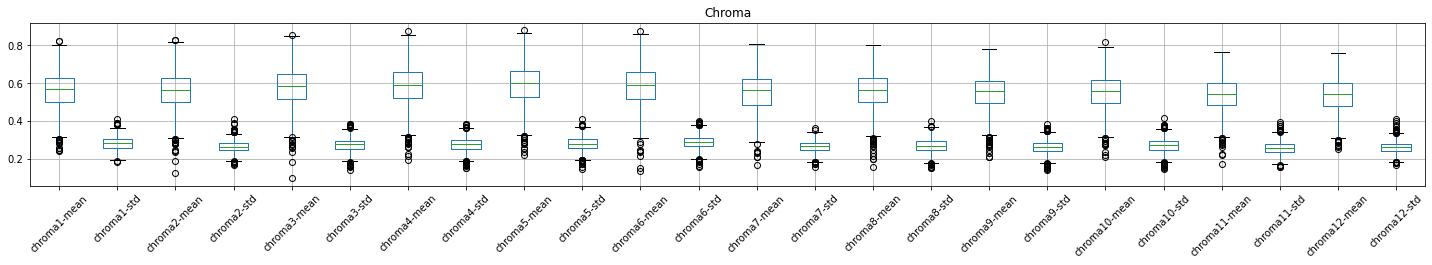

In [34]:
plt.figure(figsize=(25,3))
df.boxplot(column = columns[25:49], rot=45)
plt.title("Chroma")
plt.show()

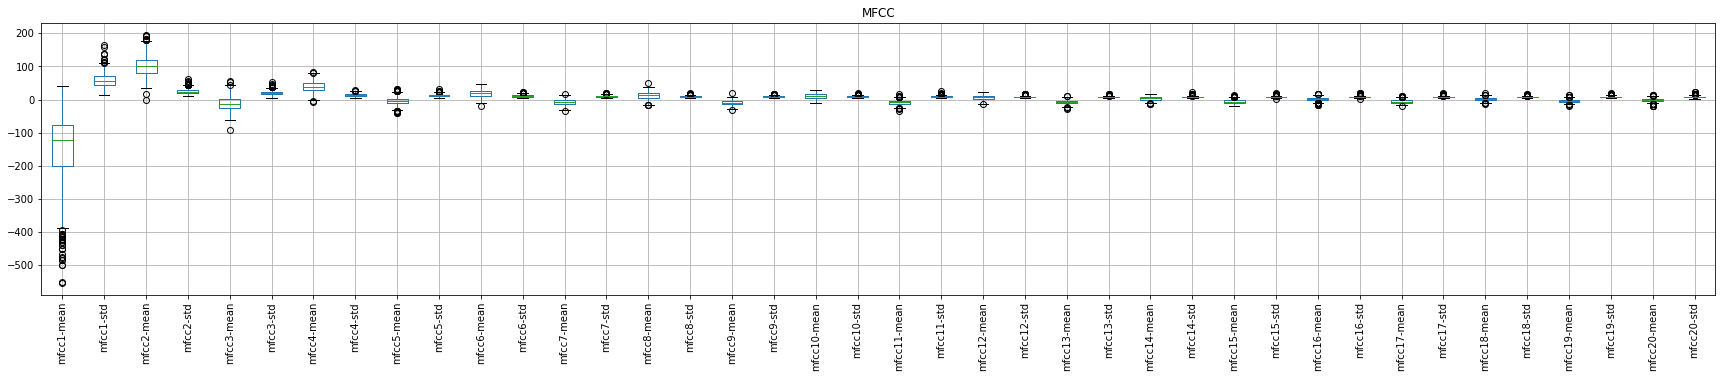

In [36]:
plt.figure(figsize=(30,5))
df.boxplot(column = columns[49:], rot=90)
plt.title("MFCC")
plt.show()